# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

![title](tabelas.png)

In [1]:
import pandas as pd #Importa o Pandas

tabela = pd.read_csv("barcos_ref.csv") # Importa o banco de dados dos 'Barcos'
display(tabela) 

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


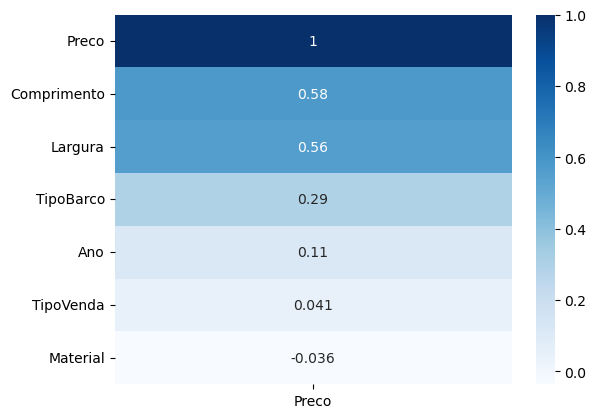

In [2]:
# Nos mostra a CORRELAÇÃO da coluna PREÇO com as demais colunas
teste = tabela.corr()[["Preco"]]
teste = teste.sort_values("Preco", ascending=False) #organiza de forma decrescente
#display(teste) 

#Para facilitar a visualização, transformaremos em gráfico:
import seaborn as sns
import matplotlib.pyplot as plt

#teste = teste.drop('Preco', axis=0) #Exclui a correlação Preço x Preço
sns.heatmap(teste, annot=True, cmap="Blues")
plt.show()

In [3]:
#Preparação das massas de dados:

from sklearn.model_selection import train_test_split #importa a train_test_split da sklearn

y = tabela["Preco"] #Y é o que queremos chegar
x = tabela.drop("Preco", axis=1) #Tirando o 'Preço', aqui é todo o restante que daremos para a IA aprender a calcular

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1) #parametrizando a IA, onde:
#Massa de treino:
#x_treino: Dados que a IA usará para treinar 
#y_treino: Resultados esperados que a IA deverá chegar durante o treino

#Massa de teste:
#x_teste: Dados que a IA usará para TESTAR (imputará estes dados e verá os resultados)
#y_teste: Resultados esperados que a IA deverá chegar durante o TESTE

In [4]:
#Criação das IAs:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# cria as inteligencias aritificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treina as inteligencias artificiais com as massas de dados
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [5]:
from sklearn import metrics

# criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))  

#Após rodar essa célula, obtivemos o seguinte resultado:
#0.4490324760735812 -> regressao linear
#0.8541522146110981 -> arvore decisao
#Nota-se que o modelo de 'Árvore de decisão' se saiu melhor com quase o dobro de precisão

0.4490324760735812
0.8405122307149859


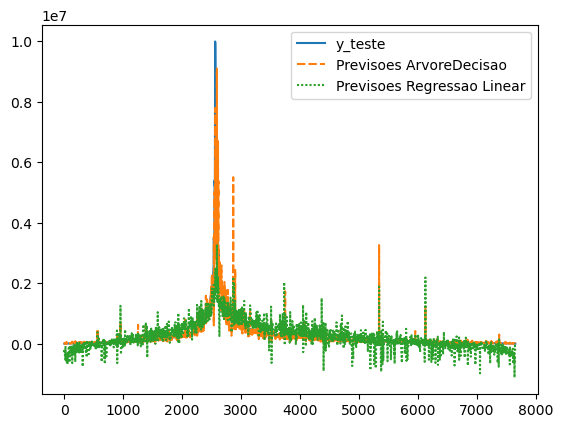

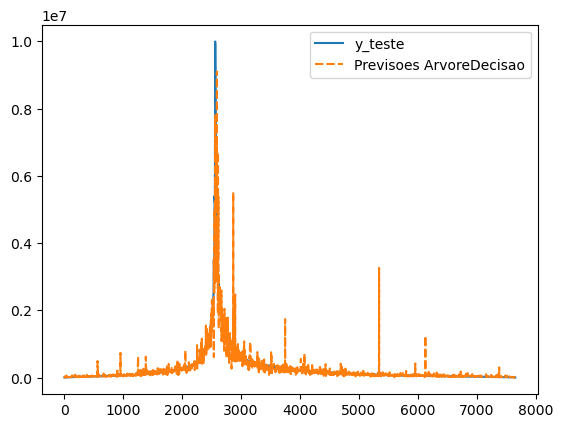

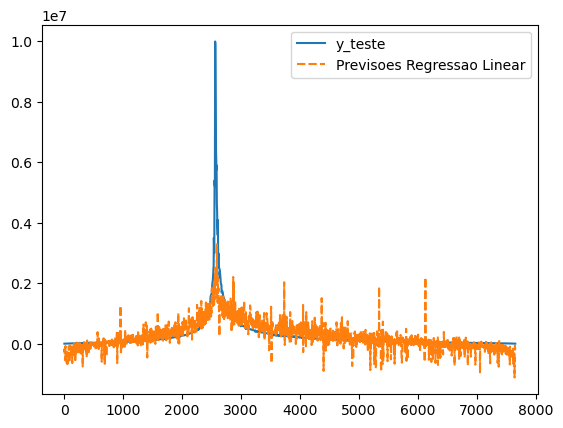

In [6]:
#Vamos ver isso em um gráfico:

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste #resultados 'reais' dos preços dos barcos
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao #Preços dos barcos pelo modelo 'Árvore de Decisão'
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear #Preços dos barcos pelo modelo 'Regressão Linear'

sns.lineplot(data=tabela_auxiliar)
plt.show()

sns.lineplot(data=tabela_auxiliar[["y_teste", "Previsoes ArvoreDecisao"]])
plt.show()

sns.lineplot(data=tabela_auxiliar[["y_teste", "Previsoes Regressao Linear"]])
plt.show()

#Após rodar a célula, podemos observar que o modelo 'Árvore de Decisão' realmente foi o que mais se aproximou dos resultados de
# 'y_teste'

In [7]:
#Com o modelo escolhido e treinado ('Árvore de Decisão'), chegou a hora de passarmos novos barcos para ele precificar:

nova_tabela = pd.read_csv("novos_barcos.csv") #importa a tabela com os novos modelos de barcos
display(nova_tabela) #Mostra a tabela com as informações dos novos barcos

previsao = modelo_arvoredecisao.predict(nova_tabela) #insere estas informações para o modelo de predição

print(previsao.round(2)) #Mostra o valor de cada barco, segundo o nosso modelo

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 5318.67  9034.76 20473.4 ]
